# 機器學習概要

機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

這種學函數的方法, 又可以分為:

* supervised learning
* unsupervised learning 

其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

今天我們就來介紹最最基本的方式, 一個是 SVM, 一個是 K-Means。

照例是讀入我們的標準套件。

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 用 SVM 來做分類

### 先做個簡單的資料

假設我們有四個點, 有兩個類別。

In [5]:
x=np.array(([-3,2],[-6,5],[3,-4],[2,-8]))
y=np.array([1,1,2,2])

我們要畫圖時, 需要把  𝑥
  中點的  𝑥
 -座標,  𝑦
 -座標分成兩個 list (array)。記得我們要  𝑥
  全部是這樣叫出來的。
  
  而  𝑥
  中前面的元素 ( 𝑥
 -座標) 是這樣。當然  𝑦
 -座標也是類似方法叫出來。

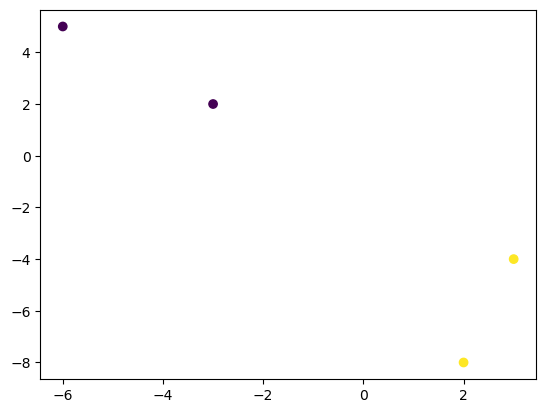

In [10]:
plt.scatter([-3,-6,3,2],[2,5,-4,-8],c=[1,1,2,2])  # 也可以 c=y

In [11]:
x

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8]])

In [12]:
x[2,1]

-4

In [14]:
x[:,0] #所有的列都要, 取第0行

array([-3, -6,  3,  2])

In [15]:
x[:,1] #所有的列都要, 第1行

array([ 2,  5, -4, -8])

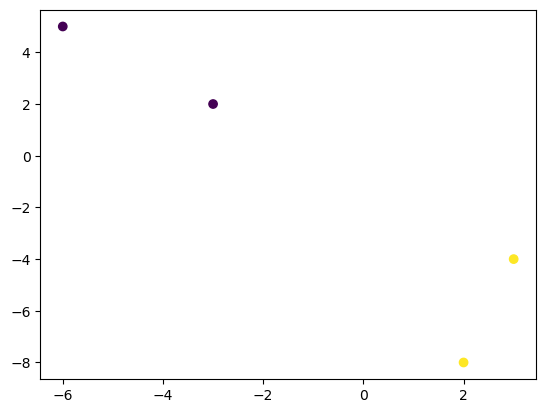

In [17]:
plt.scatter(x[:,0],x[:,1],c=y)  #改寫-正確的取點方法

於是我們就能畫圖, `s=50` 是設定點的大小, `c=y` 就是指定顏色, 不同類別不同色。

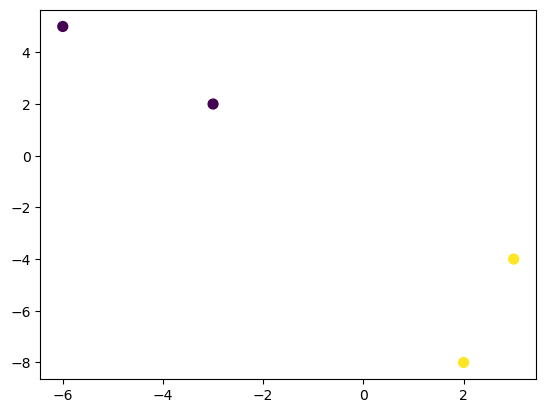

In [18]:
plt.scatter(x[:,0],x[:,1],s=50,c=y) #設點size

In [19]:
x

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8]])

In [20]:
y

array([1, 1, 2, 2])

# 0703 SVM做分類

## SVM 支持向量機

支持向量機, 大家都用英文縮寫 SVM 稱呼。是一個用曲線把資料分隔的辦法。在高維度的時候自然就是曲面 (超曲面) 分隔資料的方法。

打開一台機器 (這以後我們常常會做類似的動作)

In [31]:
from sklearn.svm import SVC

In [32]:
clf=SVC()

學習! 這樣就做完了!!

In [33]:
clf.fit(x,y)

SVC()

## 預測結果

先來看看我們之前用來學的有沒有做對。

In [34]:
clf.predict([[-3,2]])

array([1])

In [35]:
clf.predict(x)

array([1, 1, 2, 2])

## 再輸入沒有學過的點，看看分類

In [36]:
clf.predict([[2.5,3]])

array([1])

# 0704 完整畫出我們的分類結果

再來視覺化一下我們的成果。

### meshgrid

In [91]:
xx=[1,2,3,4]
yy=[5,6,7,8]

In [92]:
X,Y=np.meshgrid(xx,yy)

In [93]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [94]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [95]:
X, Y= np.meshgrid(np.linspace(-6,3,30),np.linspace(-8,5,30)) # x:-6~3, 共30點 / y:-8~5 共30點

In [96]:
X

array([[-6.        , -5.68965517, -5.37931034, -5.06896552, -4.75862069,
        -4.44827586, -4.13793103, -3.82758621, -3.51724138, -3.20689655,
        -2.89655172, -2.5862069 , -2.27586207, -1.96551724, -1.65517241,
        -1.34482759, -1.03448276, -0.72413793, -0.4137931 , -0.10344828,
         0.20689655,  0.51724138,  0.82758621,  1.13793103,  1.44827586,
         1.75862069,  2.06896552,  2.37931034,  2.68965517,  3.        ],
       [-6.        , -5.68965517, -5.37931034, -5.06896552, -4.75862069,
        -4.44827586, -4.13793103, -3.82758621, -3.51724138, -3.20689655,
        -2.89655172, -2.5862069 , -2.27586207, -1.96551724, -1.65517241,
        -1.34482759, -1.03448276, -0.72413793, -0.4137931 , -0.10344828,
         0.20689655,  0.51724138,  0.82758621,  1.13793103,  1.44827586,
         1.75862069,  2.06896552,  2.37931034,  2.68965517,  3.        ],
       [-6.        , -5.68965517, -5.37931034, -5.06896552, -4.75862069,
        -4.44827586, -4.13793103, -3.82758621, -3

### ravel 拉平法

In [97]:
X = X.ravel()
Y = Y.ravel()

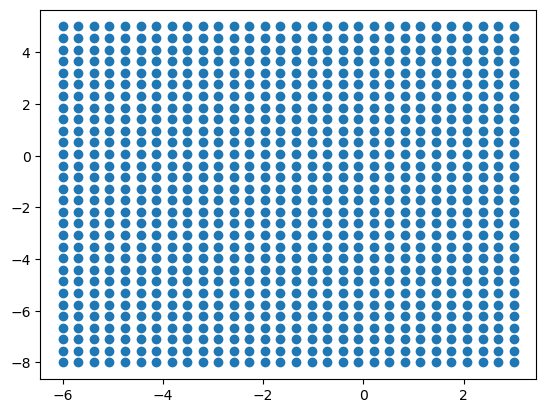

In [98]:
plt.scatter(X,Y)

### zip 高級組合法

In [86]:
xx=[1,2,3,4]
yy=[5,6,7,8]

In [87]:
list(zip(xx,yy))

[(1, 5), (2, 6), (3, 7), (4, 8)]

In [88]:
z=clf.predict(list(zip(X,Y)))

In [89]:
z

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

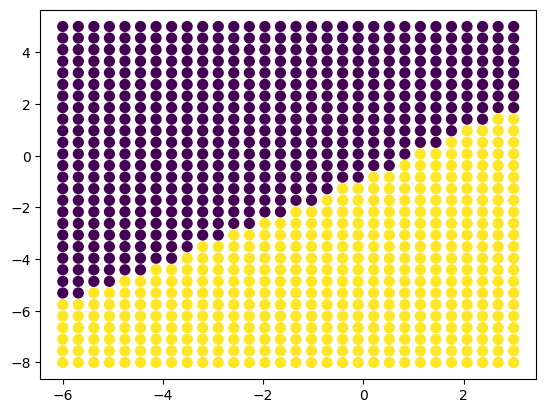

In [90]:
plt.scatter(X, Y, s=50, c=z)